## Visualizing the Gender Gap Across College Degrees

<img src = "https://pmcvariety.files.wordpress.com/2018/03/shutterstock_670731580-1-cropped.jpg"/>

The current project focuses on developing graphical explorations of the gender gap across college degrees.

The [Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) released a data set containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a University of Pennsylvania data scientist, has cleaned the data set and made it available on his personal website [here](https://app.dataquest.io/m/147/improving-plot-aesthetics/2/introduction-to-the-data).

We can investigate the percentage of degree awardees by gender throuhgout the years using various graphs. We can manipulate graphs in order to maximize presentation of the data and minimize **chartjunk**, or any other visual presentation that is not informative.

Let's start by importing libraries and the dataset:

In [1]:
#Import libraries and dataset:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

Given that we're looking at numerical, continuous data (i.e., percentage of degrees awarded) for each year across multiple years, a line graph would be our best choice of graphical presentation.

We'll begin with looking at one major, Biology:

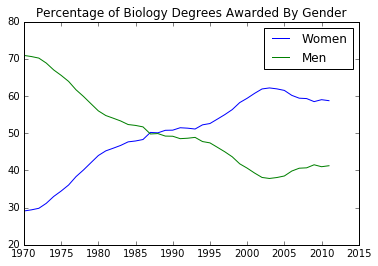

In [2]:
#Graph: % of Biology Degrees Awarded by Men and Women

fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], c='blue', label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], c='green', label='Men')
ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()

Great, we can see that in earlier years, men were awarded more Biology degrees than women. However, during 1988 or so, men and women were awarded Biology degrees equally, and since then women have been awarded more Biology degrees than men.

Next, let's focus on graphing 6 majors: 
- Engineering 
- Computer Science
- Psychology
- Biology
- Physical Sciences
- Math and Statistics

For ease of comparison, let's create one graph with 6 subplots, each plot representing the percentage of men and women (as separate lines) awarded that particular degree from 1968 to 2011.

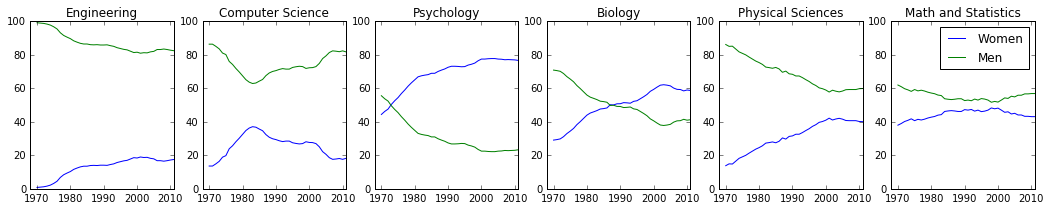

In [3]:
#Basic Graph with 6 Subplots

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], label='Men')
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
ax.legend (loc='upper right')
plt.show()

These graphs are pretty informative! They tell us that the gender gap in Computer Science and Engineering are quite large, while the gap in Biology and Math and Statistics is considerably smaller. 

In addition, the first two degree categories (Engineering and Computer Science) are dominated by men while the latter degree categories are much more balanced. Interestingly, we see that Psychology once began as a male-dominated field, but became female-dominated throughout the years.

#### Cleaning Up Chartjunk:

Excess elements, also known as chartjunk, increase as we add more plots in our graph, making it harder for the reader to interpret our charts. In general, we want to maximize the data-ink ratio, which is the fractional amount of the plotting area dedicated to displaying the data.

Non-data ink includes chart elements that do not directly display data points. This includes:
- Tick markers 
- Tick labels 
- Legends

Data ink includes elements that display and depend on the data points underlying the chart. This principle was originally proposed by [Edward Tufte](https://en.wikipedia.org/wiki/Edward_Tufte), a data visualization pioneer. 

Therefore, let's update our previous graph and remove any chartjunk. This includes removing: tick marks, tick labels, and spines. We'll also remove the legend, and instead, we'll annotate our lines by name ('Men', 'Women'). We'll also update our [color scheme](https://public.tableau.com/views/TableauColors/ColorPaletteswithRGBValues?%3Aembed=y&%3AshowVizHome=no&%3Adisplay_count=y&%3Adisplay_static_image=y) so that everyone can read it cleanly (including individuals with color blindness). 

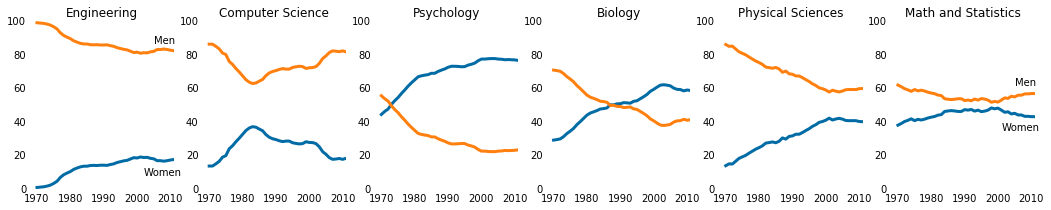

In [13]:
#Updated graph with chartjunk removed:

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

The updated graph looks much cleaner! The information is clearly the same, but we have increased our ease of readability and subsequent interpretability.

We have only plotted 6 degrees. Let us now include the remaining 11 degrees in our next graph. We can further group degrees for each column by classifying 3 types: 'STEM', 'Liberal Arts', and 'Other'.

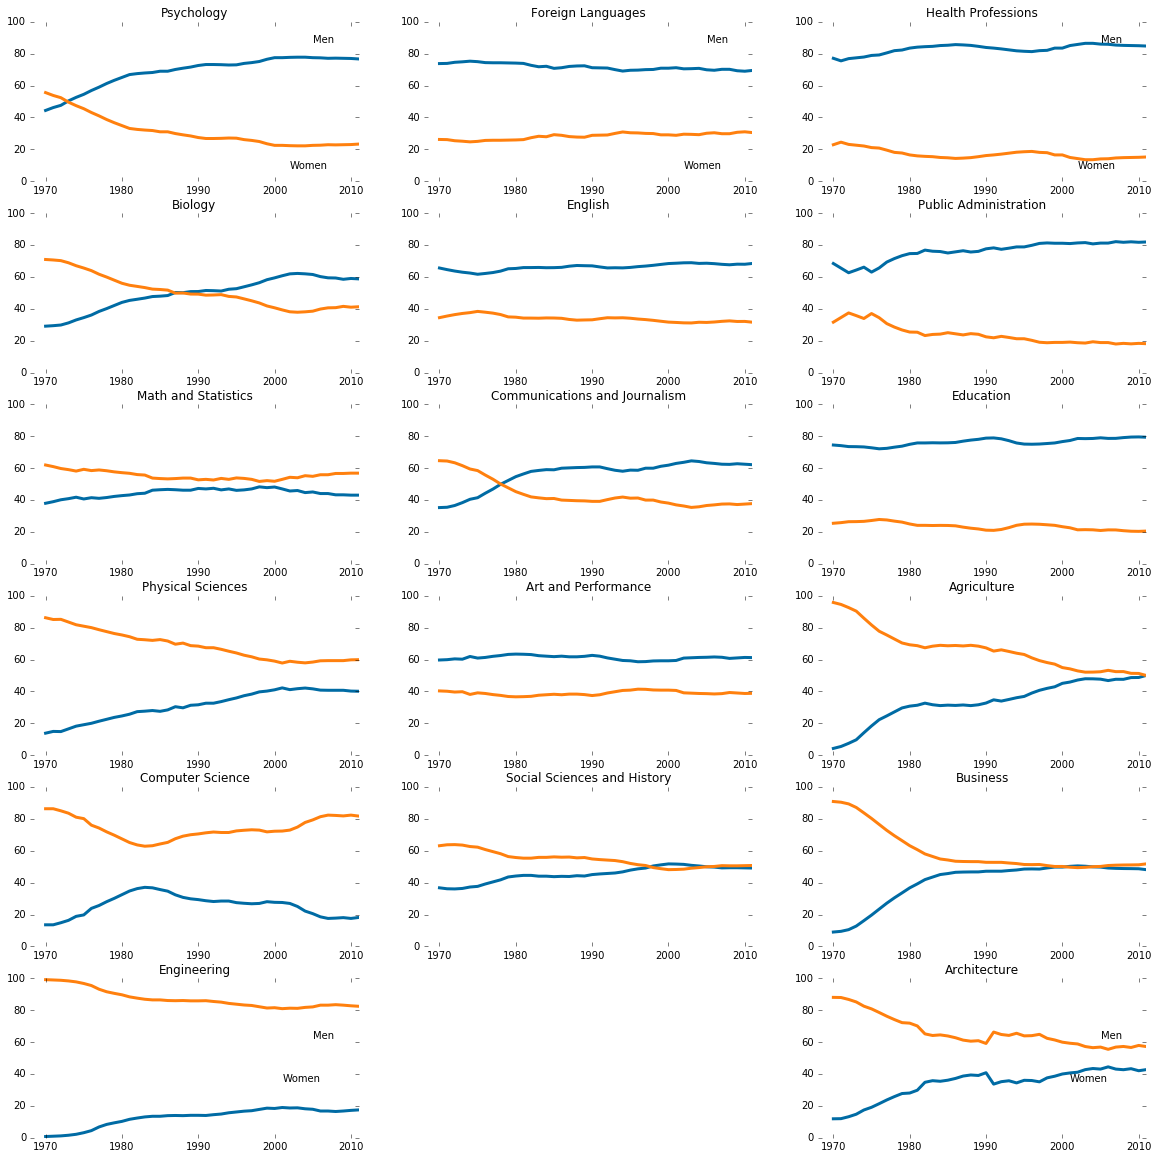

In [14]:
#6 x 3 Graph

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(20,20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3 * sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
       
for sp in range(0,5):
    ax = fig.add_subplot(6,3,3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
               
plt.show()

#### Fixing the X-Axis Label

Well, we've clearly plotted all 17 subplots, but too many non-data elements have cluttered our field of view. For example, the titles of some of our subplots obscures the x-axis labels for the subplot above it. To remedy this, we could remove the x-axis labels for every subplot in each column except for the bottom most one. 

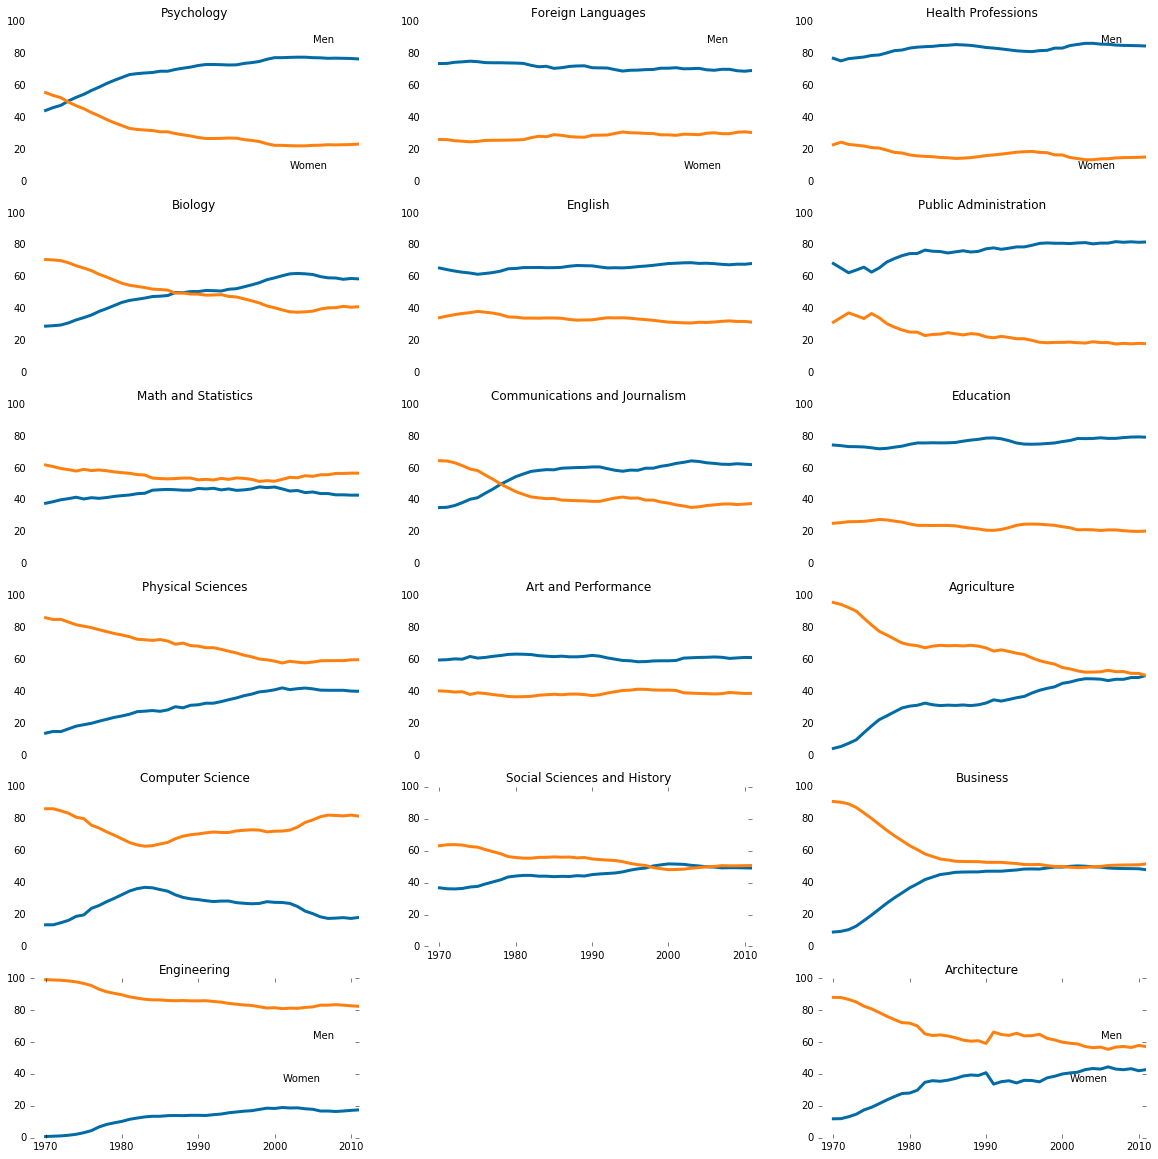

In [15]:
#6 x 3 Graph: Remove x-axis labels except bottommost

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(20, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3 * sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    if sp != 5:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)    
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
       
for sp in range(0,5):
    ax = fig.add_subplot(6,3,3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    if sp != 4:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    if sp != 5:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
               
plt.show()

#### Fixing the Y-Axis Label

Our graphs are much cleaner and more readable. In the same vein as fixing our x-axis labels, we can also simplify our y-axis labels. By keeping the starting and ending labels (0 and 100), we can maintain some of the benefits of having the y-axis label.

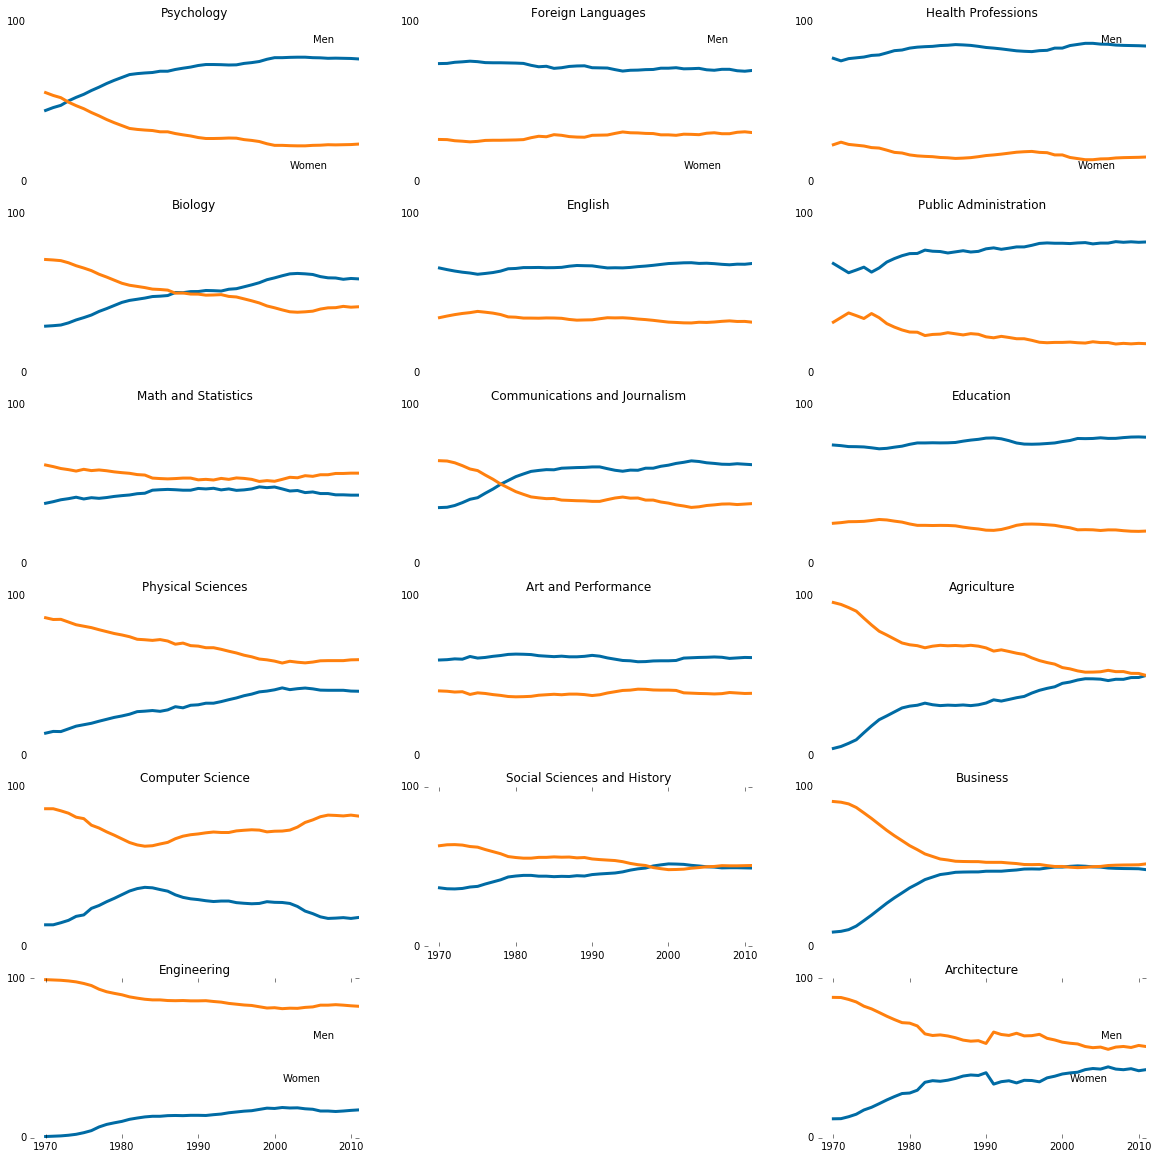

In [16]:
#6 x 3: Update the y-axis labels

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(20, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3 * sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.set_yticks([0,100])
    if sp != 5:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)    
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
       
for sp in range(0,5):
    ax = fig.add_subplot(6,3,3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.set_yticks([0,100])
    if sp != 4:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.set_yticks([0,100])
    if sp != 5:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
               
plt.show()

#### Adding a Horizontal Line

Decluttering the y-axis labels made it a bit harder to understand which degrees have close to a 50-50 gender breakdown. To facilitate interpreting these cases, we can add a horizontal line across all line charts where the y-axis label at 50 would have been.

We can modify the color and transparency of this line for ease of reading as well:

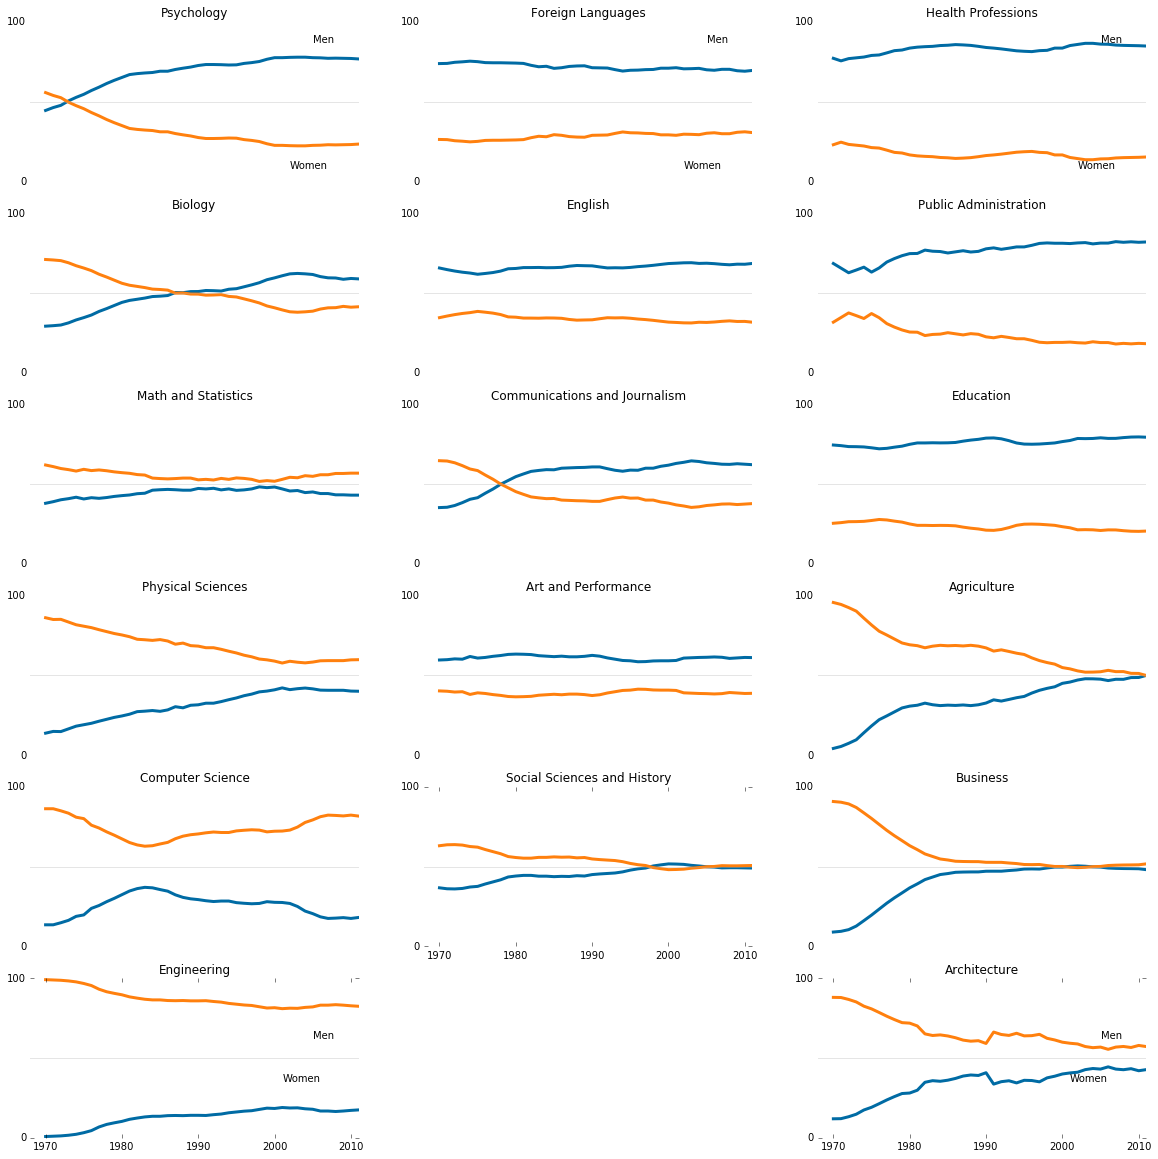

In [18]:
#6 x 3: Add Horizontal line at 50

stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(20, 20))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3 * sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp != 5:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)    
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
       
for sp in range(0,5):
    ax = fig.add_subplot(6,3,3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp != 4:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    if sp != 5:
        ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
               
plt.show()

#### Final Interpretations

Our graphs are so much more minimalist compared to our starting graphs, while retaining all import information.
What do our results show?

**STEM Degrees**
Psychology and Biology began with more male awardees, but at some point women started earning more of these degrees. There are similar percentages for men and women earning Math and Statistics degrees, while more recently, men and women are equally close to earning a Physical Science degree. Finally, there is a clear separation for Computer Science and Engineering, with more degrees earned by men compared to women.

**Liberal Arts Degrees**
Slightly more women than men earn the following degrees, which has been consistent across time: Foreign Languages, English, and Art and Performance. Also, more men than women initially earned Communications and Journalism degrees, but this switched around 1980, and has remained consistent since. Finally, men slightly earned more Social Science degrees, but over time, both men and women equally earn this degree.

**Other Degrees**
More men than women earn the following degrees, which has been consistent across time: Health Professions, Public Administration, and Education. The remaining degrees (Agriculture, Business and Architecture) began with more men receiving these degrees, but with time, men and women equally receive these degrees.